In [240]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
import json
from collections import Counter
from hazm import word_tokenize, Normalizer
from wordcloud import WordCloud

In [242]:
import arabic_reshaper
from bidi.algorithm import get_display

In [243]:
with open('../data/online.json') as f:
    data = json.load(f)

In [244]:
msg_iter = iter(data['messages'])

In [245]:
stop_words = open('stopwords.txt').readlines()
stop_words = list(map(str.strip, stop_words))
stop_words = list(map(normalizer.normalize, stop_words))

FileNotFoundError: [Errno 2] No such file or directory: 'stopwords.txt'

In [246]:
text_content = ''

for msg in data['messages']:
    if type(msg['text']) is str:
        tokens = word_tokenize(msg['text'])
        tokens = list(filter(lambda item: item not in stop_words, tokens))
        
        
        text_content += f" {' '.join(tokens)}"
    

In [247]:
#Counter(word_tokenize(text_content)).most_common()

In [248]:
normalizer = Normalizer()
text_content = normalizer.normalize(text_content)

In [249]:
text_content = arabic_reshaper.reshape(text_content)
text_content = get_display(text_content)

In [250]:
wordcloud = WordCloud(width=1200, height=1200, font_path='./BHoma.ttf',background_color='white').generate(text_content)
#wordcloud = WordCloud(background_color='white').generate(text_content)

OSError: cannot open resource

(-0.5, 1199.5, 1199.5, -0.5)

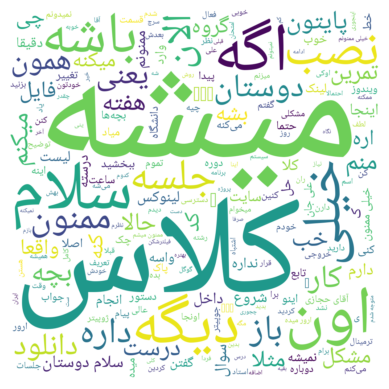

In [239]:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [76]:
#tokens = word_tokenize(text_content)

In [106]:
#Counter(tokens).most_common()